In [1]:
# Importing all the necessory libraries
import csv
import numpy as np
import pandas as pd
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

tsv_file = open('r.tsv',encoding="utf8")
read_tsv = csv. reader(tsv_file, delimiter="\t")

array = []
count = 0

for row in read_tsv:
    if(count<300000):
        array.append(row)
        count+=1
    else:
        break
tsv_file. close()

array = np.array(array)

# Create the pandas DataFrame
df = pd.DataFrame(array, columns = ['user_id', 'timestamp', 'artist_mbid', 'artist_name', 'song_mbid', 'song_title'])
  
# print dataframe.
df

,user_id,timestamp,artist_mbid,artist_name,song_mbid,song_title
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Mc1 (Live_2009_4_15)
...,...,...,...,...,...,...
299995,user_000012,2005-10-23T23:09:49Z,230ca093-1d00-4c57-9235-147942f66930,The Zombies,3deba5e7-9a30-40f6-ad66-e57ab383064f,Going Out Of My Head
299996,user_000012,2005-10-23T23:07:00Z,aa7a2827-f74b-473c-bd79-03d065835cf7,Franz Ferdinand,a01ce43e-1706-4c7e-b461-1265b9615377,Evil And A Heathen
299997,user_000012,2005-10-23T23:04:37Z,a097d0ef-493b-4f69-953c-f2a676668d2a,Burdocks,,Triage
299998,user_000012,2005-10-23T23:00:57Z,e86ab653-bec8-46f3-b4b6-a1a866919ef6,The Tragically Hip,27ab2a02-27fa-4c7a-8ae2-8770637644d4,Emergency


In [2]:
df = df.drop(columns=['timestamp', 'artist_mbid', 'artist_name', 'song_mbid'])
df

,user_id,song_title
0,user_000001,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,Composition 0919 (Live_2009_4_15)
2,user_000001,Mc2 (Live_2009_4_15)
3,user_000001,Hibari (Live_2009_4_15)
4,user_000001,Mc1 (Live_2009_4_15)
...,...,...
299995,user_000012,Going Out Of My Head
299996,user_000012,Evil And A Heathen
299997,user_000012,Triage
299998,user_000012,Emergency


In [3]:
# label_encoder object knows how to understand word labels.
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['user_id'] = label_encoder1.fit_transform(df['user_id'])
df['song_title'] = label_encoder2.fit_transform(df['song_title'])

df

,user_id,song_title
0,0,14451
1,0,8285
2,0,25073
3,0,17146
4,0,25072
...,...,...
299995,11,15540
299996,11,12709
299997,11,42857
299998,11,12062


In [4]:
arr_10_users = []
users = [0,1,2,3,4,5,6,7,8,9]
for user in users:
    count=0
    for row in df.itertuples(index = False):
        if(row[0]==user):
            arr_10_users.append(row)
            count+=1

        
arr_10_users = np.array(arr_10_users)
df = pd.DataFrame(arr_10_users, columns = ['user_id','song_title'])

  
df

,user_id,song_title
0,0,14451
1,0,8285
2,0,25073
3,0,17146
4,0,25072
...,...,...
212881,9,43562
212882,9,4797
212883,9,10500
212884,9,43732


In [6]:
# Formation of user-item matrix
users=10
items=212886
matrix = np.zeros((users, items))
for row in df.itertuples(index = False):
    matrix[row.user_id-1][row.song_title-1] +=1
    
    
print (np.max(matrix))

2119.0


In [7]:
matrix_small = np.zeros((10,22000))

for i in range(10):
    for j in range(22000):
        matrix_small[i][j] = matrix[i][j]


matrix = matrix_small
print(matrix.shape)

(10, 22000)


In [7]:
# # In our paper 10*242 was formed, and here 10*403 is formed

# ## NORMALIZING THE DATA TO 1-10
# matrix = (matrix-np.min(matrix))/(np.max(matrix)-np.min(matrix))*10

In [8]:
import random
  
list = []
for i in range(22000):
    list.append(i)
n = 13200

matrix_test = np.zeros((10,22000))

for i in range(10):
    indexeListForTest = random.sample(list, n)
    for index in indexeListForTest:
        matrix_test[i][index] = matrix[i][index]
        matrix[i][index] = 0
        


In [9]:
arr1_train = matrix
arr1_test = matrix_test

In [10]:
def NNM(Y,R,lamda,epochs):
    X0 = np.random.randint(1,5,size=(Y.shape[0],Y.shape[1]))
    for i in range(epochs):
        B = X0 + (Y - np.multiply(R,X0))
        U,s,V = np.linalg.svd(B)
        
        s = np.absolute(s)
        
        for si in range(len(s)):
            s[si]=max(0,s[si]-(lamda/2))

        SIGMA = np.zeros([Y.shape[0], Y.shape[1]])
        for si in range(len(s)):
            SIGMA[si][si]=s[si]
        
        X0 = np.matmul(U,np.matmul(SIGMA,V))
    return X0

In [11]:
def MAE_calc(arr1_train,arr1_test,lamda,epoch,threshold):
    Y = arr1_train
    R = np.zeros([arr1_train.shape[0],arr1_train.shape[1]])
    for i in range(arr1_train.shape[0]):
        for j in range(arr1_train.shape[1]):
            if(Y[i][j]!=0):
                R[i][j]=1

    X_predicted = NNM(Y,R,lamda,epoch) 
    
    MSE = 0
    count = 0
    num = 0  
    den = 0    
    relevent = 0 

    for i in range(arr1_test.shape[0]):
        for j in range(arr1_test.shape[1]):
            if(arr1_test[i][j]>0):
                MSE+=abs(arr1_test[i][j]-X_predicted[i][j])
                count+=1
                
                if(X_predicted[i][j]>=threshold):
                    den+=1
                    if(arr1_test[i][j]>=threshold):
                        num+=1
                if(arr1_test[i][j]>=threshold):
                    relevent+=1

    precision = 0
    if(den!=0):
        precision = num/den
    
    recall = 0
    if(relevent!=0):
        recall = num/relevent

    if(count==0):
        return (0,precision,recall,X_predicted)
    else:
        return ((MSE/count),precision,recall,X_predicted)

In [12]:
print(arr1_train.shape)

(10, 22000)


Lamda: 0.8  Thresh: 0.35   MAE: 4.6351509907344015  Precision: 1.0  Recall: 1.0
Lamda: 1  Thresh: 0.35   MAE: 4.628750605400269  Precision: 1.0  Recall: 1.0
Lamda: 1.2  Thresh: 0.35   MAE: 4.607906716328837  Precision: 1.0  Recall: 1.0
Lamda: 1.4  Thresh: 0.35   MAE: 4.617543816337382  Precision: 1.0  Recall: 1.0
Lamda: 1.6  Thresh: 0.35   MAE: 4.6121505518499255  Precision: 1.0  Recall: 1.0


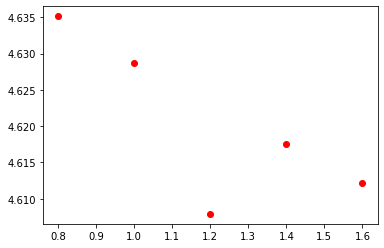

In [13]:
# Keeping the threshold constant to find the best lambda and MAE
lamdas = [0.8,1,1.2,1.4,1.6]
MAEs = [0,0,0,0,0]
count = 0
threshold = 0.35

for lam in lamdas:
    [MAE,precision,recall,X_predicted] = MAE_calc(arr1_train,arr1_test,lam,5,threshold)
    print("Lamda:",lam," Thresh:",threshold,"  MAE:",MAE, " Precision:",precision," Recall:",recall)
    MAEs[count]=MAE
    count+=1
plt.plot(lamdas,MAEs,'ro')

In [14]:
# Keeping the lambda constant to find the best threshold and precision
thresholds = [0.1,0.4,0.6,0.8,1]
Precisions = [0,0,0,0,0]
Recalls = [0,0,0,0,0]
count=0
lam = 1.6

for threshold in thresholds:
    [MAE,precision,recall,X_predicted] = MAE_calc(arr1_train,arr1_test,lam,5,threshold)
    print("Lamda:",lam," Thresh:",threshold,"  MAE:",MAE, " Precision:",precision," Recall:",recall)
    Precisions[count]=precision
    Recalls[count]=recall
    count+=1
plt.plot(thresholds,Precisions,'ro')

Lamda: 1.6  Thresh: 0.1   MAE: 4.626564973298396  Precision: 1.0  Recall: 1.0
Lamda: 1.6  Thresh: 0.4   MAE: 4.632051659592585  Precision: 1.0  Recall: 1.0


KeyboardInterrupt: 

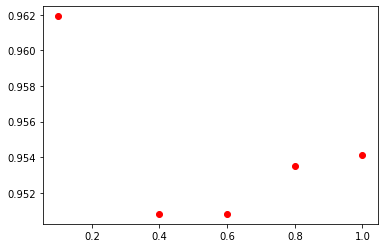

In [29]:
plt.plot(thresholds,Recalls,'ro')

In [30]:
lam_best = 1.6
threshold_best = 0.1
[MAE,precision,recall,X_predicted] = MAE_calc(arr1_train,arr1_test,lam_best,100,threshold_best)
print("Lamda:",lam_best," Thresh:",threshold_best,"  MAE:",MAE, " Precision:",precision," Recall:",recall)

KeyboardInterrupt: 

In [49]:
print(arr1_train)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [23  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [13]:
# Cosine pairwise distances between user with users and items with items
arr1 = arr1_train
arr2 = arr1_test

metric='cosine'
metric1 = 1-pairwise_distances(arr1, metric=metric)

metric='cosine'
metric2 = 1-pairwise_distances(arr1.T, metric=metric)

In [96]:
# print(metric1)

In [108]:
#User based
n_users = 10
n_items = 8870

thresholds=[0.007,2,3,4]


for threshold in thresholds:
    mean=0
    totalitems=0
    for i in range(n_users):
        for j in range(n_items):
            if(arr2[i,j]!=0):
                rating=0
                den=0
                for k in range(n_users):
                    if(k!=i and arr1[k,j]!=0):
                        if(metric1[i,k]>=threshold):
                            rating=rating + (metric1[i,k]*arr1[k,j])
                            den=den+metric1[i,k]
                if(den!=0):
                    rating=rating/den
                    actual=arr2[i,j]
                    diff=abs(rating-actual)
                    mean=mean+diff
                    totalitems=totalitems+1

    
    if(totalitems==0):
        print(0)
    else:
        mean=mean/totalitems
        print("Means:",threshold,":",mean)

Means: 0.007 : 9.59518730832445
0
0
0


In [ ]:
# Items based
#numpy k largest element
def sortfunc(arr1,K):
    sort=np.zeros((n_items,n_items))
    sort=np.argsort(arr1, axis=1)
    for i in range(n_items):
        sort[i]=sort[i][::-1]
    return sort

K=[10,20,30,40]
for threshold in K:
    mean=0
    totalitems=0
    sort=sortfunc(metric2,threshold)[:,1:]
    for u in range(n_users):
        for i in range(n_items):
            if(arr2[u,i]!=0):
                rating=0
                den=0
                for k in range(threshold):
                    #Top K items
                    if(arr1[u,sort[i,k]]!=0):
                        rating=rating + (metric2[i,sort[i,k]]*arr1[u,sort[i,k]])
                        den=den+metric2[i,sort[i,k]]
                if(den!=0):
                    rating=rating/den
                    actual=arr2[u,i]
                    print(actual,rating)
                    diff=abs(rating-actual)
                    mean=mean+diff
                    totalitems=totalitems+1
    mean=mean/totalitems
#     print(mean,totalitems)
    print("Means:",threshold,":",mean)

In [50]:
count=0
for i in arr2[9]:
    if i==0:
        count+=1
print(count)

7636


In [51]:
#User based
n_users = 10
n_items = 8870

thresholds=[-180,-170,-160,-158]


for threshold in thresholds:
    mean=0
    totalitems=0
    for i in range(n_users):
        for j in range(n_items):
            if(arr2[i,j]==0):
                rating=0
                den=0
                for k in range(n_users):
                    if(k!=i and arr1[k,j]!=0):
                        if(metric1[i,k]>=threshold):
                            rating=rating + (metric1[i,k]*arr1[k,j])
                            den=den+metric1[i,k]
                if(den!=0):
                    rating=rating/den
                    arr2[i,j]=rating


0
0
0
0


In [58]:
predicted_user9_ratings = arr2[9]
print(predicted_user9_ratings)
print(len(predicted_user9_ratings))
print(np.mean(predicted_user9_ratings))

[0.64516129 0.32258065 0.32258065 ... 2.5207134  2.53750098 0.64516129]
8870
2.1029152001082156


In [126]:
array_items = []
for i in range(len(predicted_user9_ratings)):
    if(predicted_user9_ratings[i]>8):
        array_items.append(i)
        
# print(label_encoder.classes_)
array_items = label_encoder2.inverse_transform(array_items)
print(len(array_items))

18


In [135]:
import json

array_items = array_items.tolist()

with open('songList.json', 'w') as f:
    json.dump(array_items, f)

In [17]:


# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tqdm



You should consider upgrading via the 'c:\users\91901\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [14]:



import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances
from collections import Counter
from sklearn.model_selection import KFold
from sklearn import preprocessing 
from scipy.spatial import distance
import math
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans







matrix=metric2
print(matrix.shape)
data=pd.DataFrame(matrix)
print(data.shape)

#Pickling the Citation Matrix
#pickling_on = open("CitationMatrix.pickle","wb")
#pickle.dump(data, pickling_on,protocol=4)
#pickling_on.close()

#%%

#K means clustering from SCRATCH 

def Kmeans(movieRatings, n_iter, K, distanceMeasure):  
    
    #Initialization Stage
    if isinstance(movieRatings, pd.DataFrame):
        X = movieRatings.values
    idx = np.random.choice(len(X), K, replace=False)
    centroids = X[idx, :]
    
    #Get Min values for all users from centriods and get their initial clusters
    P = np.argmin(distance.cdist(X, centroids, distanceMeasure),axis=1)
    #shape of P is (X.shape[0], 1)
    
    #Looping Stage
    for _ in range(n_iter):
            centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(K)])
            tmp = np.argmin(distance.cdist(X, centroids, distanceMeasure),axis=1)
            if np.array_equal(P,tmp):break
            P = tmp       
    #print(P[0:50])
    
    finalCentroid=[0 for i in range(K)]
    finalDistance=[math.inf for i in range(K)]
    
    
    for i in range(len(P)):    
        initalrating= movieRatings.iloc[i].values.reshape(1,1664)
        currentCentroid= centroids[P[i]].reshape(1,1664)
        
    
        dist = distance.cdist(initalrating, currentCentroid, distanceMeasure)
        #print(dist)
        if(dist<finalDistance[P[i]]):
            #print(dist, " " , i, " " , P[i])
            finalDistance[P[i]]=dist
            finalCentroid[P[i]]=i    
            
    return finalCentroid  , P

#%% --------------------------------------------------------------------
    #CALCULATE MAE 
    #This is just for testing purposes of the ALGO
# ---------------------------------------------------------DONT RUN THIS CELL

cv = KFold(5, shuffle=False, random_state=None)
foldnumber=1

for train_index, test_index in cv.split(data):
    print("Fold ",foldnumber)
    foldnumber += 1
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    print(train_index, " " , test_index)
    print(train.shape, " TRAIN " , test.shape, " TEST ")
    
    #Train the dataset to get cluster centroids
    #centroids, clusters= Kmeans(train, n_iter, n_clusters, distanceMeasure)
    km = KMeans(n_clusters=10, max_iter=100, random_state=0).fit(train)
    #Training -----------------------
    #km = TimeSeriesKMeans(n_clusters=10, metric="euclidean", max_iter=10,random_state=0).fit(train)
    print(km.cluster_centers_.shape)
    centroids = km.cluster_centers_
    
    #Testing -----------------------
    predicted = km.predict(test)
    #print(km.cluster_centers_)
    
    #MAE Calculation -------------------
    maeFold = 0
    for row in range(len(predicted)):
        clusterNumberPredicted = predicted[row]
        predictedCitations = centroids[clusterNumberPredicted]
        
        originalCitations = test.iloc[row]
        
        mae = mean_absolute_error(originalCitations, predictedCitations)
        maeFold += mae
    
    print("MAe value for fold ", (foldnumber-1) , " is ", maeFold)
    
    
#%%

#FIND RECOMMENDATIONS ------------------------------------------------------
    
    



(22000, 22000)
(22000, 22000)
Fold  1
[ 4400  4401  4402 ... 21997 21998 21999]   [   0    1    2 ... 4397 4398 4399]
(17600, 22000)  TRAIN  (4400, 22000)  TEST 
(10, 22000)
MAe value for fold  1  is  2.503894951453964
Fold  2
[    0     1     2 ... 21997 21998 21999]   [4400 4401 4402 ... 8797 8798 8799]
(17600, 22000)  TRAIN  (4400, 22000)  TEST 
(10, 22000)
MAe value for fold  2  is  2.763187836687676
Fold  3
[    0     1     2 ... 21997 21998 21999]   [ 8800  8801  8802 ... 13197 13198 13199]
(17600, 22000)  TRAIN  (4400, 22000)  TEST 
(10, 22000)
MAe value for fold  3  is  2.7794638391261524
Fold  4
[    0     1     2 ... 21997 21998 21999]   [13200 13201 13202 ... 17597 17598 17599]
(17600, 22000)  TRAIN  (4400, 22000)  TEST 
(10, 22000)
MAe value for fold  4  is  2.5637942249958217
Fold  5
[    0     1     2 ... 17597 17598 17599]   [17600 17601 17602 ... 21997 21998 21999]
(17600, 22000)  TRAIN  (4400, 22000)  TEST 
(10, 22000)
MAe value for fold  5  is  2.5733135634727233


NameError: name 'papers' is not defined

In [ ]:
#POI_ID = "P12-1041"
POI_INDEX = 10

#Making Training Data
trainingData = data.drop(POI_INDEX, axis=0, inplace=False)
trainingData.drop(POI_INDEX, axis=1, inplace=True)

#Making Testing Data
testingData = data.iloc[POI_INDEX]
testingData.drop(POI_INDEX, inplace=True)

    #Training -----------------------
kMeans = KMeans(n_clusters=10, max_iter=100, random_state=0)
AllotedClustersTraining = kMeans.fit_predict(trainingData)

    #Testing -----------------------
testingData = testingData.values.reshape(1,-1)
AllotedCluster = kMeans.predict(testingData)


# Finding Predictions
clusterArray = []
for i in range(len(AllotedClustersTraining)):
    if(AllotedClustersTraining[i]==AllotedCluster):
        clusterArray.append(i)


distanceMeasure = 'euclidean'
distanceArray = {}
for i in range(len(clusterArray)):
    trainingclusterCitations = trainingData.iloc[clusterArray[i]].values.reshape(1,-1)
    d = distance.cdist(trainingclusterCitations, testingData, distanceMeasure)
    distanceArray[clusterArray[i]] = d[0][0]
    
dict(sorted(distanceArray.items(), key=lambda item: item[1]))

#Finding Recommendations 
print("Index of paper of Interest- ", POI_INDEX)
#print("Papers Recommended for Paper ID- ", POI_ID)
#print("Title- " , papers[POI_ID].title)
topKPapers = 5
for i in range(topKPapers):
    pid = list(distanceArray.keys())[i]
    for j in papers:
        if(papers[j].pid==pid):
            print(i+1, ". ", papers[j].title , " " , j)